In [1]:
import numpy as np

In [6]:
np.random.randint(1,7)

4

In [9]:
def tirar_dado_lista(cantidad_de_tiradas = 50):
    cantidad_de_caras = 6
    resultados = []
    for i in range(cantidad_de_tiradas):
        # Notar que le sumo uno por que randint(N) va desde 0 hasta N-1
        d1 = np.random.randint(cantidad_de_caras) + 1
        resultados.append(d1)    
    return resultados

In [11]:
#tirar_dado_lista()

# Ejercicio 2
## Enunciado
A partir de la notebook "Ejemplo-Fashion-MNIST.ipynb" armar una serie de clasificadores bayesianos:
* 1) Todos los pixels tiene la misma distribución de probabilidades para cada clase de grises y se generan de manera independiente.
* 2) Se separa la imagen en cuatro cuadrantes y los pixels de cada cuadrante tienen la misma distribución de probabilidades para cada clase y se generan de manera independiente.
* Se pide estimar las probabilidades de niveles de grises para cada caso utilizando un subconjunto de entrenamiento de los datos y en función de esa estimación medir la performance del modelo con un subconjunto de validación

In [43]:
# %load MNIST_helper.py
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def plot_number(x_train, y_train, number, show_label=True, figsize=(10, 5)):
    plt.imshow(x_train[number], cmap='gray')
    if show_label:
        plt.text(0,0,str(y_train[number]), color='w', size=20, verticalalignment="top")
    plt.show()
    
def create_row(x_train, numbers):
    concatenated = x_train[numbers[0]]
    numbers=numbers[1:]
    for n in numbers:
        concatenated = np.concatenate((concatenated, x_train[n]), axis=1)
    return concatenated

def plot_numbers(x_train, numbers, columns=10, show_label=True, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    numbers = np.array(numbers).reshape(-1, columns)
    concatenated = create_row(x_train, numbers[0])
    numbers = numbers[1:,:]
    for row in numbers:
        concatenated = np.concatenate((concatenated, create_row(x_train, row)))
    plt.imshow(concatenated, cmap='gray')
    plt.show()
 
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
folder = "./"
#Train data
trainImages = np.load(folder+'train_images.npy')
trainLabels = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
#test data
testImages = np.load(folder+'train_images.npy')
testLabels = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)

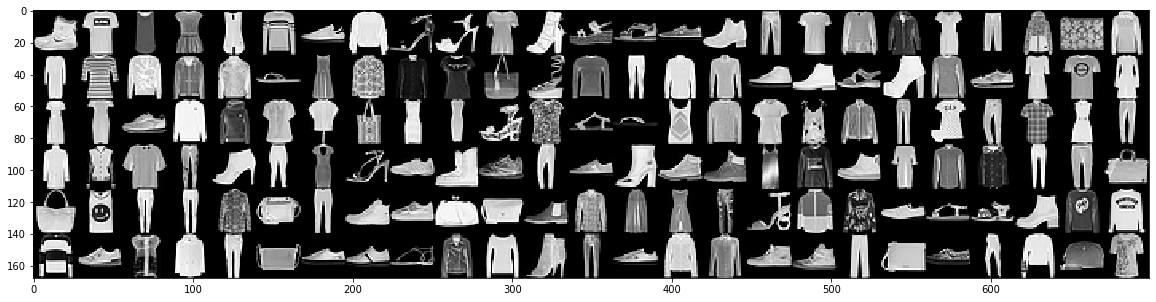

In [54]:
plot_numbers(trainImages.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

In [55]:
train_data = np.array(trainImages, dtype='float32')
test_data = np.array(testImages, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [65]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [78]:
print('x_train: ', x_train.shape)
print('x_validate: ', x_validate.shape)
print('y_train: ', y_train.shape)
print('y_validate: ', y_validate.shape)
#Interpreto como 38400 imagenes de entrenamiento de 27X28
#Interpreto como 9600 imagenes de validación de 27X28
#Interpreto como 38400 labels de entrenamiento de 28
#Interpreto como 9600 labels de validación de 28

x_train:  (38400, 27, 28)
x_validate:  (9600, 27, 28)
y_train:  (38400, 28)
y_validate:  (9600, 28)


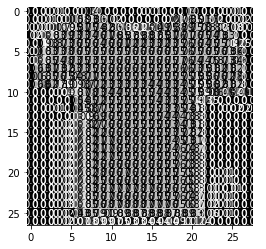

In [83]:
#Imprimo el primer objeto del arreglo de entrenamiento, 
#números del 0 al 255 porque así representa los colores
x_train_1 = x_train[0]
visualize_input(x_train_1,plt)
plt.show()

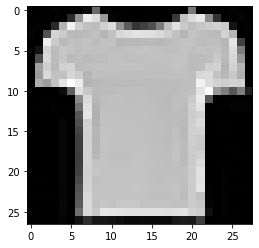

In [85]:
#Lo mismo que antes, pero con la imágen en escala de grises, no numerada
plt.imshow(x_train_1, cmap='gray')
plt.show()

NameError: name 'show' is not defined

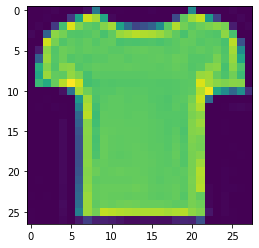

In [87]:
plt.imshow(x_train_1)
()
